# Random Forest Regression and Linear Regression Model
Overview of Implementation
1. <a href="#section1">Import Dataset</a>
2. <a href="#section2">Cleaning the Data for Model Training</a>
3. <a href="#section3">Random Tree Regressor</a>
4. <a href="#section4">Linear Regression Model</a>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
import researchpy as rp
import math
from scipy.stats import skew 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean, median, mode, stdev
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## <a id='section1'>1. Import Dataset</a>

In [2]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## <a id='section2'>2. Cleaning the Data for Model Training</a>
Remove the NA data and perform One Hot Encoding

### 2.1. Removing the Null Data

In [3]:
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train.dropna(subset=drop, inplace=True)

train

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 2.2. One-Hot Encoding

In [4]:
#One-Hot encoding
categoricalcolumns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
train1 = pd.get_dummies(train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(train1)

        Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        1     8450       2003          2003       196.0         706   
1        2     9600       1976          1976         0.0         978   
2        3    11250       2001          2002       162.0         486   
3        4     9550       1915          1970         0.0         216   
4        5    14260       2000          2000       350.0         655   
...    ...      ...        ...           ...         ...         ...   
1455  1456     7917       1999          2000         0.0           0   
1456  1457    13175       1978          1988       119.0         790   
1457  1458     9042       1941          2006         0.0         275   
1458  1459     9717       1950          1996         0.0          49   
1459  1460     9937       1965          1965         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0              0        150          856       856  ...     

## <a id='section3'>3. Random Tree Regressor</a>
This model can be used for both classification and regression, and is built on top of the Decision Tree method. It works by randomly selecting data subsets, creating decision trees on each subset, and then vote for the best solution. The more trees there are in the forest, the more robust the model. While Random Forest can eliminate the problem of overfitting that a normal Decision Tree might experience, it is slower and might be difficult to interpret.

We first employ a random forest classifier with default parameters.

In [18]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [182]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy = model.score(train_X,train_Y)
test_accuracy = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.963543605951842
Test accuracy = 0.8614879795828779


In [183]:
#comparing the actual and the predicted SalePrice values
df = pd.DataFrame({'Real Values':test_Y, 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
1093,146000,144445.0
1094,129000,124850.0
1095,176432,182800.7
1097,170000,145030.0
1098,128000,108478.4
...,...,...
1455,175000,175226.5
1456,210000,201950.0
1457,266500,259400.0
1458,142125,153490.0


In [184]:
#Accuracy report
realVals = df["Real Values"]
predictedVals = df["Predicted Values"]
mse = mean_squared_error(realVals, predictedVals)
rmse = math.sqrt(mse)
print ("Mean square error (MSE) = ", mse)
print ("Root mean square error (RMSE) = ", rmse)
average_y = mean(realVals)
mbs = mean_absolute_error(realVals, predictedVals)
print("Mean absolute error (MBS) = ", mbs)
print ("The MBS occupies ",(mbs/average_y), " of the average SalePrice value")

Mean square error (MSE) =  816790230.020379
Root mean square error (RMSE) =  28579.542159040597
Mean absolute error (MBS) =  18549.319241982506
The MBS occupies  0.10136395696688677  of the average SalePrice value


### 3.1. Optimization Strategy 1: Feature Importance

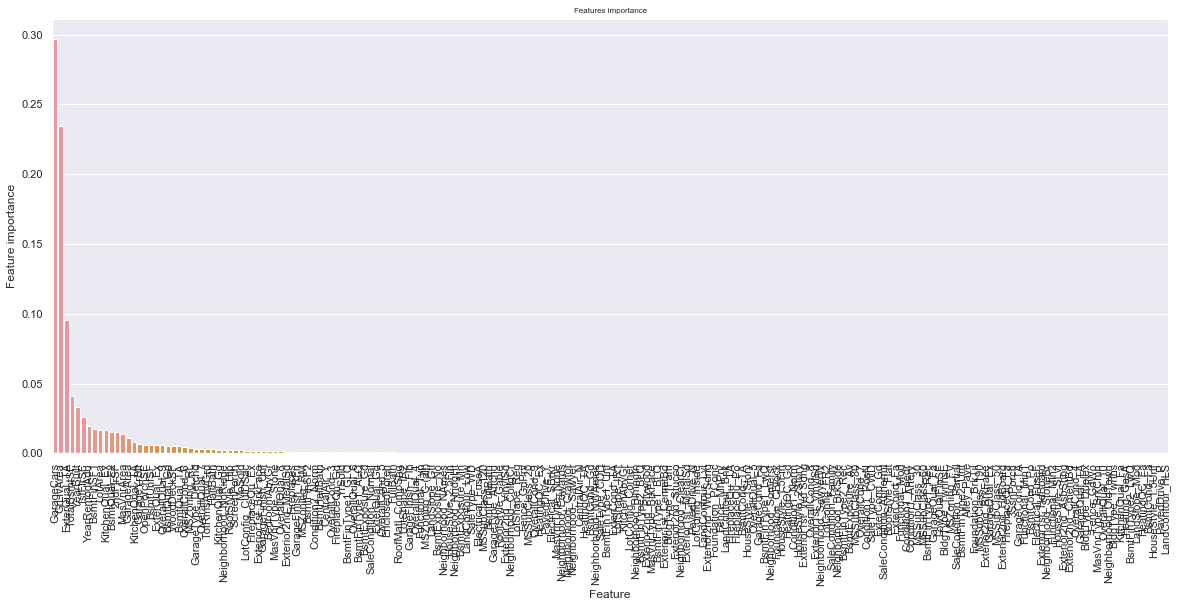

In [185]:
#model optimisation - feature importance
tmp = pd.DataFrame({'Feature': train_X.columns, 'Feature importance': model.feature_importances_})
tmp1 = tmp.sort_values(by='Feature importance',ascending=False)
tmp1 = tmp1[:198] #drop all variables which have zero feature importance
plt.figure(figsize = (20,8))
plt.title('Features importance',fontsize=8)
s = sb.barplot(x='Feature',y='Feature importance',data=tmp1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [186]:
#List of features sorted from most to least important
sorted_importances = pd.DataFrame(tmp1['Feature importance'])
sorted_features = pd.DataFrame(tmp1['Feature'])
print(sorted_importances)
print(sorted_features)

     Feature importance
21             0.296703
11             0.234821
197            0.095489
7              0.041215
1              0.033435
..                  ...
239            0.000014
212            0.000013
122            0.000013
286            0.000013
61             0.000012

[198 rows x 1 columns]
               Feature
21          GarageCars
11           GrLivArea
197       ExterQual_TA
7          TotalBsmtSF
1            YearBuilt
..                 ...
239       HeatingQC_Fa
212        BsmtCond_Fa
122  HouseStyle_1.5Unf
286       PavedDrive_P
61     LandContour_HLS

[198 rows x 1 columns]


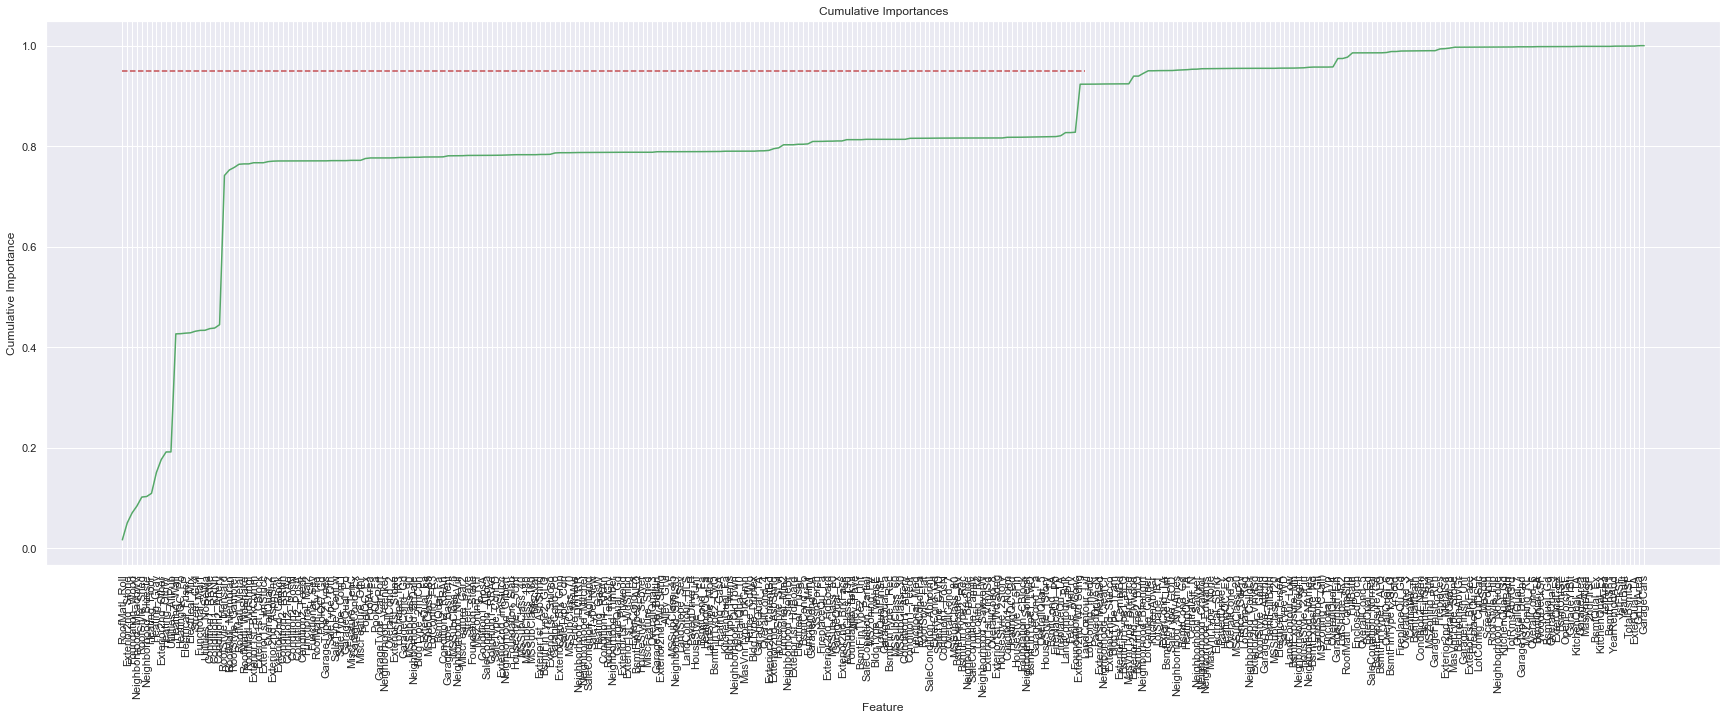

In [187]:
importance = model.feature_importances_

featurelist = []
for c in train_X.columns:
    featurelist.append(c)

indices = np.argsort(importance)
cumulativeimpt= np.cumsum(importance)
featurerank = [featurelist[i] for i in indices]


plt.figure(figsize=(30,10))
plt.plot(featurerank, cumulativeimpt, 'g-')
plt.xticks(featurerank, rotation = 'vertical')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

In [188]:
countimpt = 0
for i in cumulativeimpt:
    if i >= 0.95:
        countimpt += 1
    
print('Number of features for 95% importance:', countimpt)

Number of features for 95% importance: 103


In [189]:
# Extract the names of the most important features
important_feature_names = sorted_features[0:countimpt]
print (important_feature_names)

              Feature
21         GarageCars
11          GrLivArea
197      ExterQual_TA
7         TotalBsmtSF
1           YearBuilt
..                ...
225  BsmtFinType1_Unf
201      ExterCond_TA
56       LotShape_IR1
17       KitchenAbvGr
66   LotConfig_Corner

[103 rows x 1 columns]


In [190]:
list1 = []
for i in sorted_features[0:countimpt]["Feature"]:
    list1.append(i)

In [191]:
#use the top 106 variables for regression model training
train_X_new = train_X[list1]
test_X_new = test_X[list1]

In [192]:
#Accuracy after feature selection
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X_new, train_Y)
y_pred = model.predict(test_X_new)
train_accuracy_new = model.score(train_X_new,train_Y)
test_accuracy_new = model.score(test_X_new,test_Y)
print ("Train accuracy =", model.score(train_X_new,train_Y))
print ("Test accuracy =", model.score(test_X_new,test_Y))

Train accuracy = 0.9578857763690893
Test accuracy = 0.862032495323316


In [193]:
#improvement in accuracy
train_improvement = (train_accuracy_new - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_new - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -0.5871897802864363 %
Test accuracy improvement = 0.06320642346069306 %


We can see that the test accuracy has improved slightly with feature selection

### 3.2. Optimization Strategy 2: Data Transformation - Reducing Skewness in Continuous Variables
- Log Transformation 
- Removing outliers with IQR

In [194]:
# identifying continuous variables with high skewness
continuous = ['LotArea', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
array1 = skew(train1[continuous])
#the top 15 features which are the most skewed
index1 = array1.argsort()[-15:][::-1]
continuous_skewed=[]
for i in index1:
    print (continuous[i],": skewness = ", array1[i])
    if array1[i]>=1:
        continuous_skewed.append(continuous[i])

MiscVal : skewness =  24.732979451706033
PoolArea : skewness =  14.342881566937836
LotArea : skewness =  12.025446327344339
LowQualFinSF : skewness =  10.66505349858299
3SsnPorch : skewness =  9.96262046395852
KitchenAbvGr : skewness =  5.129053439295553
BsmtFinSF2 : skewness =  4.174330005566947
ScreenPorch : skewness =  3.967379533802487
BsmtHalfBath : skewness =  3.89811918894981
EnclosedPorch : skewness =  3.214887613130617
MasVnrArea : skewness =  2.588332838278803
OpenPorchSF : skewness =  2.2638025759950504
BsmtFinSF1 : skewness =  1.6941364533315026
TotalBsmtSF : skewness =  1.6330286577439608
WoodDeckSF : skewness =  1.5027101898713007


In [195]:
#applying log transformation for selected variables
train2=train1.copy()
for i in continuous_skewed:
    train2[i] = train2[i].map(lambda l: np.log(l) if l > 0 else 0)

In [196]:
array2 = skew(train2[continuous])
#the top 10 features which are the most skewed
index2 = array2.argsort()[-15:][::-1]
continuous_skewed=[]
for i in index2: 
    print (continuous[i],": skewness = ", array2[i])
    if array2[i] >= 1:
        continuous_skewed.append(continuous[i])

BsmtHalfBath : skewness =  36.97297297297236
PoolArea : skewness =  13.892471985364587
LowQualFinSF : skewness =  8.537169018827495
3SsnPorch : skewness =  7.475352552864676
MiscVal : skewness =  5.151007848096852
KitchenAbvGr : skewness =  4.960618997125171
ScreenPorch : skewness =  3.0205800205812574
BsmtFinSF2 : skewness =  2.453380237081663
EnclosedPorch : skewness =  2.203145749719571
GrLivArea : skewness =  1.4168971139325073
1stFlrSF : skewness =  1.3857782746124663
BsmtUnfSF : skewness =  0.9266242711949279
GarageArea : skewness =  0.8114489269622572
2ndFlrSF : skewness =  0.7879161526110934
TotRmsAbvGrd : skewness =  0.6758238152091317


In [197]:
#revert the log transformation if the skewness increases after log transformation
for i in index2: 
    print (continuous[i],": skewness = ", array1[i],"\t, skewness2 = ", array2[i])
    if array2[i] >= array1[i]:
        train2[continuous[i]] = train1[continuous[i]]

BsmtHalfBath : skewness =  3.89811918894981 	, skewness2 =  36.97297297297236
PoolArea : skewness =  14.342881566937836 	, skewness2 =  13.892471985364587
LowQualFinSF : skewness =  10.66505349858299 	, skewness2 =  8.537169018827495
3SsnPorch : skewness =  9.96262046395852 	, skewness2 =  7.475352552864676
MiscVal : skewness =  24.732979451706033 	, skewness2 =  5.151007848096852
KitchenAbvGr : skewness =  5.129053439295553 	, skewness2 =  4.960618997125171
ScreenPorch : skewness =  3.967379533802487 	, skewness2 =  3.0205800205812574
BsmtFinSF2 : skewness =  4.174330005566947 	, skewness2 =  2.453380237081663
EnclosedPorch : skewness =  3.214887613130617 	, skewness2 =  2.203145749719571
GrLivArea : skewness =  1.4168971139325073 	, skewness2 =  1.4168971139325073
1stFlrSF : skewness =  1.3857782746124663 	, skewness2 =  1.3857782746124663
BsmtUnfSF : skewness =  0.9266242711949279 	, skewness2 =  0.9266242711949279
GarageArea : skewness =  0.8114489269622572 	, skewness2 =  0.811448

In [198]:
#recalculating skewness of continuous variables
array2 = skew(train2[continuous])
#the top 10 features which are the most skewed
index2 = array2.argsort()[-15:][::-1]
for i in index2: 
    print (continuous[i],": skewness = ", array2[i])

PoolArea : skewness =  13.892471985364587
LowQualFinSF : skewness =  8.537169018827495
3SsnPorch : skewness =  7.475352552864676
MiscVal : skewness =  5.151007848096852
KitchenAbvGr : skewness =  4.960618997125171
BsmtHalfBath : skewness =  3.89811918894981
ScreenPorch : skewness =  3.0205800205812574
BsmtFinSF2 : skewness =  2.453380237081663
EnclosedPorch : skewness =  2.203145749719571
GrLivArea : skewness =  1.4168971139325073
1stFlrSF : skewness =  1.3857782746124663
BsmtUnfSF : skewness =  0.9266242711949279
GarageArea : skewness =  0.8114489269622572
2ndFlrSF : skewness =  0.7879161526110934
TotRmsAbvGrd : skewness =  0.6758238152091317


After doing the log transformation, we selected continuous variables that still gives a skewness value of more than 1.
We then used the interquartile range (IQR) method to remove the outliers.

In [199]:
print(train2.shape)
# calculate interquartile range
q25, q75 = train2[continuous_skewed].quantile(0.25), train2[continuous_skewed].quantile(0.75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

train3 = train2[~((train2>upper)).any(axis=1)]
print(train3.shape)

(1370, 316)
(799, 316)


In [200]:
#calculating skewness of continuous variables
array = skew(train3[continuous])
#the top 3 features which are the most skewed
index = array.argsort()[-3:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

BsmtUnfSF : skewness =  0.8134469641710275
GarageArea : skewness =  0.7509952288155002
2ndFlrSF : skewness =  0.6462040969748152


In [201]:
#train-test split
train4 = train3.copy()
TEST_SIZE = 0.25

filteredData1 = train4.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [202]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy_skew = model.score(train_X,train_Y)
test_accuracy_skew = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9796262860476713
Test accuracy = 0.8148356391154808


In [203]:
#improvement in accuracy
train_improvement = (train_accuracy_skew - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_skew - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = 1.6691180343563168 %
Test accuracy improvement = -5.415321115680056 %


### 3.3. Optimization Strategy 3: Data Transformation - Reducing Skewness in Categorical Variables

**Dealing with highly skewed categorical features** <br>
As identifited from data exploration, we remove categorical variables with one category of data occuping >= 90% of data.

In [205]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
#skewness of categorical variables
max_percent = []
catogorical_skewed=[]
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90:
        catogorical_skewed.append(i)
        print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 15
Street /ratio of the dominant category =  0.9964
LandContour /ratio of the dominant category =  0.9015000000000001
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9467
Condition2 /ratio of the dominant category =  0.9898
RoofMatl /ratio of the dominant category =  0.9818000000000001
BsmtCond /ratio of the dominant category =  0.9246
Heating /ratio of the dominant category =  0.981
CentralAir /ratio of the dominant category =  0.9495999999999999
Electrical /ratio of the dominant category =  0.9226000000000001
Functional /ratio of the dominant category =  0.9336
GarageQual /ratio of the dominant category =  0.9504
GarageCond /ratio of the dominant category =  0.9612999999999999
PavedDrive /ratio of the dominant category =  0.9372
MiscFeature /ratio of the dominant category =  0.9216


In [206]:
for i in catogorical_skewed:
    train.drop(columns=[i], inplace=True)

In [207]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,NaN,Reg,Inside,CollgCr,Norm,1Fam,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,NaN,Reg,FR2,Veenker,Feedr,1Fam,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,NaN,IR1,Inside,CollgCr,Norm,1Fam,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,NaN,IR1,Corner,Crawfor,Norm,1Fam,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,NaN,IR1,FR2,NoRidge,Norm,1Fam,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [208]:
#One-Hot encoding
categoricalcolumns = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']
train1 = pd.get_dummies(train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(train1)

        Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        1     8450       2003          2003       196.0         706   
1        2     9600       1976          1976         0.0         978   
2        3    11250       2001          2002       162.0         486   
3        4     9550       1915          1970         0.0         216   
4        5    14260       2000          2000       350.0         655   
...    ...      ...        ...           ...         ...         ...   
1455  1456     7917       1999          2000         0.0           0   
1456  1457    13175       1978          1988       119.0         790   
1457  1458     9042       1941          2006         0.0         275   
1458  1459     9717       1950          1996         0.0          49   
1459  1460     9937       1965          1965         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0              0        150          856       856  ...     

In [209]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [210]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy_skew2 = model.score(train_X,train_Y)
test_accuracy_skew2 = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9609803142969432
Test accuracy = 0.8655956996854772


In [211]:
#improvement in accuracy
train_improvement = (train_accuracy_skew2 - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_skew2 - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -0.26602757146279926 %
Test accuracy improvement = 0.47681687962590114 %


Performing data transformation on the categorical variables has successfully increased the model accuracy.

### 3.4. Optimization Strategy 4: Normalization (Min-Max Scaling) and Z-Score Standardization
Data transformation on the continuous variables has not successfully increase the model accuracy. We will now try to see if normalization helps to improve the model accuracy. This scaling method is useful when the data set does not contain outliers. As such, it can be done after we have reduced the skewness of continuous data. 

In [217]:
# data normalization from sklearn
# fit scaler on training data
features = train4.copy()
norm = MinMaxScaler().fit(features)
# transform training data
features_norm = norm.transform(features)

In [218]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = features.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [221]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy_norm = model.score(train_X,train_Y)
test_accuracy_norm = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9796262860476713
Test accuracy = 0.8148356391154808


In [222]:
#improvement in accuracy
train_improvement = (train_accuracy_norm - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_norm - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = 1.6691180343563168 %
Test accuracy improvement = -5.415321115680056 %


In [223]:
features_stan=train4.copy()
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(features_stan[[i]])
    # transform training data column
    features_stan[i] = scale.transform(features_stan[[i]])

In [224]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = features_stan.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [225]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy_stan = model.score(train_X,train_Y)
test_accuracy_stan = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9796109575558335
Test accuracy = 0.8157607077728247


In [227]:
#improvement in accuracy
train_improvement = (train_accuracy_stan - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_stan - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = 1.6675271886755252 %
Test accuracy improvement = -5.307940783131274 %


Both methods have failed to increase the model accuracy. Z-standardization is useful when the data follows a normal distribution (Gaussian distribution), if the data does not follow normal distribution then this may be problematic. This may be the cause to why it has not improved the model accuracy.

## <a id='section4'>4. Linear Regression Model</a>
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [30]:
model = LinearRegression()
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy = model.score(X,y)
test_accuracy = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.9382591211607739
Test accuracy =  0.6684188934420106


In [20]:
predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_Y, predicted_y)
rmse = math.sqrt(mse)
print ("Root mean square error (RMSE) = ", rmse)

Root mean square error (RMSE) =  44218.74611080778


### 4.1 Feature Selection 

In [5]:
# variables most closely related to SalePrice
corr = train1.corr()['SalePrice']
feature_select=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.3):
        feature_select.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
print(corr.nlargest(corrshape)[1:corrshape])
print(len(feature_select))

GrLivArea            0.709783
GarageCars           0.636173
GarageArea           0.607197
TotalBsmtSF          0.603284
1stFlrSF             0.596087
                       ...   
OverallQual_5       -0.383080
GarageType_Detchd   -0.406550
BsmtQual_TA         -0.456964
GarageFinish_Unf    -0.485273
KitchenQual_TA      -0.527689
Name: SalePrice, Length: 314, dtype: float64
47


In [13]:
#train-test split
TEST_SIZE = 0.25

filteredData2 = train1.drop(['Id'], axis=1)[feature_select+['SalePrice']]
train_df, test_df = train_test_split(filteredData2, test_size=TEST_SIZE, random_state = 0)

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

# initialisation for training data
model = LinearRegression()
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy_select = model.score(X,y)
test_accuracy_select = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.8607185591841964
Test accuracy =  0.7112439464939588


In [8]:
predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_Y, predicted_y)
rmse = math.sqrt(mse)
print ("Root mean square error (RMSE) = ", rmse)

Root mean square error (RMSE) =  42549.16018262429


In [17]:
#improvement in accuracy
train_improvement = (train_accuracy_select - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_select - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -8.264301430999966 %
Test accuracy improvement = 6.40691839684864 %


Feature selection has improved the prediction model greatly

### 4.2 Parameter Tuning

In [28]:
#Removing intercept for the model
model = LinearRegression(fit_intercept= False)
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy1 = model.score(X,y)
test_accuracy1 = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.9382591211607739
Test accuracy =  0.6718588884076327


In [31]:
#improvement in accuracy
train_improvement = (train_accuracy1 - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy1 - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = 0.0 %
Test accuracy improvement = 0.5146465785711122 %


Removing an intercept for the prediction model has actually improved the prediction accuracy, meaning that the data is more centered than expected. With trial and errors (not listed here), all other changes in parameter did not improve the model accuracy.